In [1]:
from mp_api.client import MPRester
from pymatgen.phonon.plotter import PhononBSPlotter
from pymatgen.phonon.bandstructure import PhononBandStructure

No module named 'phonopy'


In [2]:
mp_id = "mp-37906"
api_key = "U5rwd3sdglPsztvgTrc7TwUsvvfTEfOn"

# Structure from material id
with MPRester(api_key) as m:
    phonon_band_structure = m.get_phonon_bandstructure_by_material_id(mp_id)

Retrieving PhononBSDOSDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

# Strucutre de bandes des phonons

<module 'matplotlib.pyplot' from 'C:\\Users\\Cyril\\OneDrive - UCL\\Projets_informatiques\\Python\\Tache\\lib\\site-packages\\matplotlib\\pyplot.py'>

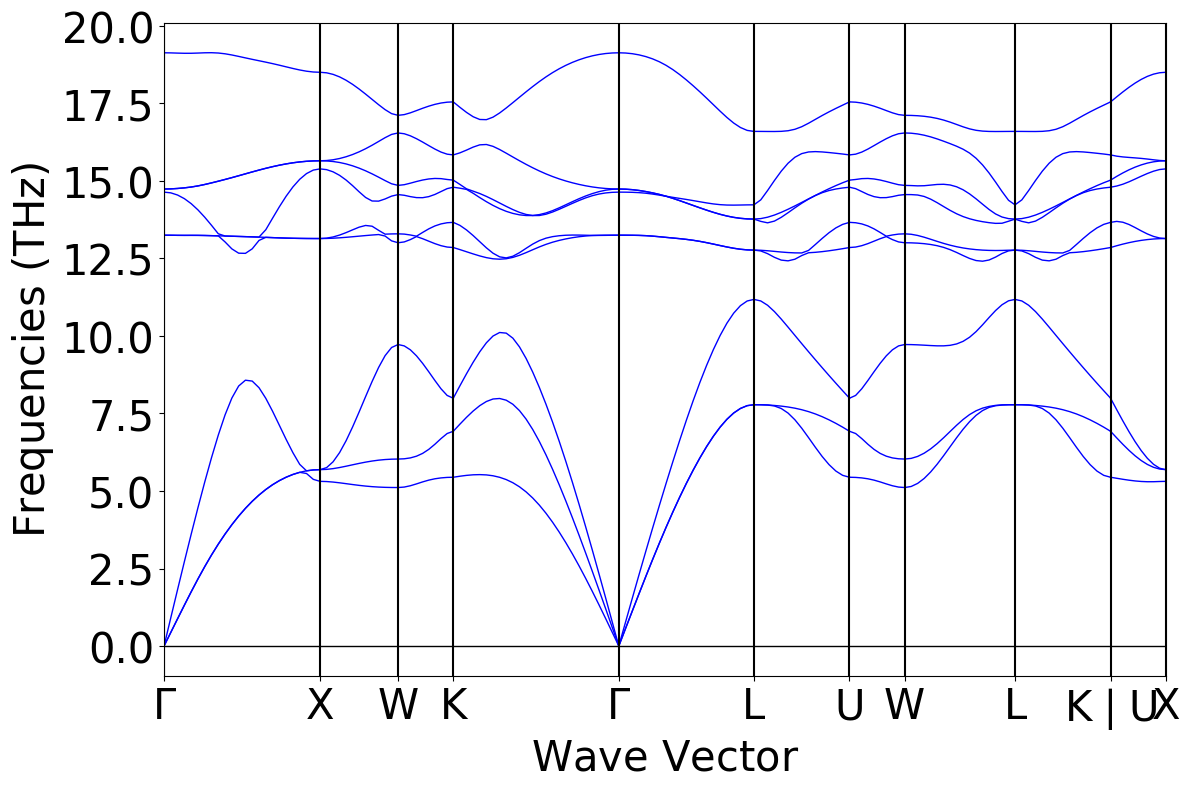

In [3]:
plot = PhononBSPlotter(phonon_band_structure)
plot.get_plot()

# Zone de Brillouin

In [4]:
plot.plot_brillouin()

<Figure size 640x480 with 0 Axes>

## Calcul de la vitesse du son pour trois branches acoustiques différentes dans trois directions différentes de la zone de Brillouin



In [5]:
# Récupération des données
data = plot.bs_plot_data()
distances = data.get("distances")
frequencies = data.get("frequency")

## Théorie des calculs

Nous pouvons calculer la vitesse du son dans les différentes branches en approximant la pente de ces branches acoustiques à l'origine $\Gamma$ de la zone de Brillouin.
En effet, la pente à l'origine suit une relation linéaire, la relation de dispersion: $\omega = v_s \: q$,
on peut donc trouver la vitesse du son via l'équation: $v_s = \frac{\delta \omega}{\delta q}$ à  l'origine.


## Choix des directions
Dans le cadre de cet exercice, il nous est demandé de choisir 3 directions différentes.
Les 3 directions possibles sont:
 - $\Gamma - X$
  - $\Gamma - K$
  - $\Gamma - L$

## Choix des bandes
Il nous est aussi demandé d'utiliser 3 branches acoustiques différentes. Nous choisirons les 3 premières par simplicité.
La première bande sera représentée en orange dans le graphe suivant.
La seconde sera représentée en vert clair et la troisième en cyan.

In [6]:
# Choix des directions
dist1 = distances[0]
dist2 = distances[3]
dist3 = distances[4]

# Choix des bandes
freq1 = frequencies[0][0]
freq2 = frequencies[3][1]
freq3 = frequencies[4][2]

# Calcul des pentes
pente1 = np.polyfit((dist1[0], dist1[1], dist1[2]), (freq1[0], freq1[1], freq1[2]), 1)
pente2 = np.polyfit((dist2[-2], dist2[-1]), (freq2[-2], freq2[-1]), 1)
pente3 = np.polyfit((dist3[0], dist3[1], dist3[2]), (freq3[0], freq3[1], freq3[2]), 1)

# Coefficient multiplicateur
coeff = 2 * pi * 1e12 * 1e-10

# Calcul des vitesses du son
v1 = np.abs(pente1[0] * coeff)
v2 = np.abs(pente2[0] * coeff)
v3 = np.abs(pente3[0] * coeff)

# Première Branche
print(r"Dans la direction Γ-X pour la première branche:")
print(f"La vitesse du son est: {v1} [m/s] \n")

# Seconde branche
print(r"Dans la direction Γ-K pour la seconde branche:")
print(f"La vitesse du son est: {v2} [m/s] \n")

# Troisième branche
print(r"Dans la direction Γ-L pour la troisième branche:")
print(f"La vitesse du son est: {v3} [m/s] \n")

Dans la direction Γ-X pour la première branche:
La vitesse du son est: 5034.974321687723 [m/s] 

Dans la direction Γ-K pour la seconde branche:
La vitesse du son est: 7111.47453123191 [m/s] 

Dans la direction Γ-L pour la troisième branche:
La vitesse du son est: 8845.103215474643 [m/s] 



## Représentation graphique des résultats

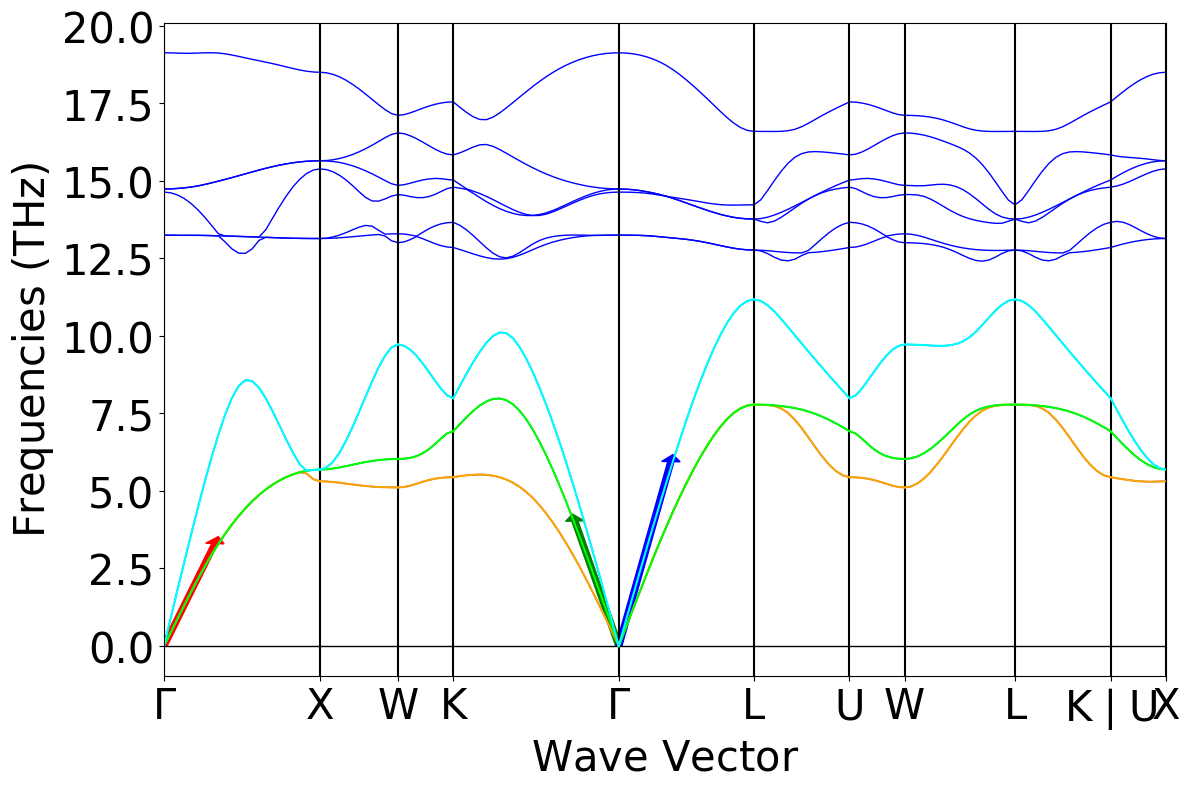

In [7]:
# Fonctions des pentes
f1 = lambda x: x * pente1[0] + pente1[1]
f2 = lambda x: x * pente2[0] + pente2[1]
f3 = lambda x: x * pente3[0] + pente3[1]

# Calcul des tailles de flèche
dx1 = dist1[8] - dist1[0]
dy1 = f1(dist1[8]) - f1(dist1[0])

dx2 = dist2[-8] - dist2[-1]
dy2 = f2(dist2[-8]) - f2(dist2[-1])

dx3 = dist3[8] - dist3[0]
dy3 = f3(dist3[8]) - f3(dist3[0])

# Création du graphe
plot.get_plot()

for i in range(len(distances)):
    plt.plot(distances[i],frequencies[i][0],'orange')
    plt.plot(distances[i],frequencies[i][1],'lime')
    plt.plot(distances[i],frequencies[i][2],'cyan')

plt.arrow(dist1[0], freq1[0], dx1, dy1, color='red', width = 0.05, length_includes_head =True)
plt.arrow(dist2[-1], freq2[-1], dx2, dy2, color='green', width = 0.05, length_includes_head =True)
plt.arrow(dist3[0], freq3[0], dx3, dy3, color='blue', width = 0.05, length_includes_head =True)